In [52]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mK as mK
from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mf2 as mf2
from TO_sim.Get_groups import phase_diagram,make_meanr

from TO_sim.gen_Distribution import Normal
from TO_sim.gen_Distribution import Quantile_Normal as Q_Normal
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from tqdm.notebook import tqdm
from scipy.signal import find_peaks
import parmap

In [77]:
df  = pd.read_csv('Km ver 1, m = 0to10,K= 0to10, 0.1.csv',index_col=[0,1])
df2 = pd.read_csv('Km ver 4, m = 0to10,K= 0to10, 0.2,0.2.csv',index_col=[0,1])
df3 = pd.read_csv('Km ver 5, m = 0to10,K= 0to10, 0.2,0.2.csv',index_col=[0,1])

In [78]:
Ks2 = np.arange(0,10,0.2)
ms2 = np.arange(0,10,0.2)
KK2,MM2 = np.meshgrid(Ks2,ms2)

Ks = np.linspace(0,10,101)
ms = np.linspace(0,10,101)
KK,MM = np.meshgrid(Ks,ms)

Ks3 = np.linspace(0,10,51)
ms3 = np.linspace(0,10,51)
KK3,MM3 = np.meshgrid(Ks3,ms3)

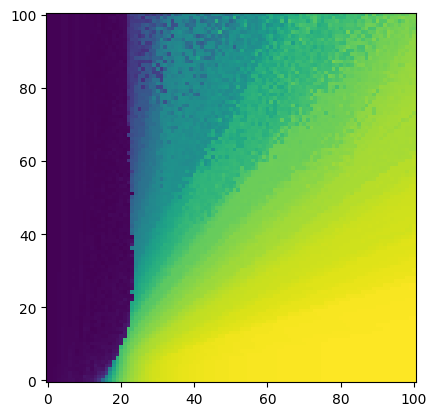

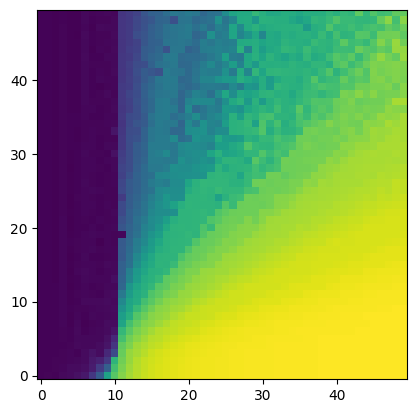

In [55]:
plt.imshow(df.unstack().r.to_numpy().T,origin='lower')
plt.figure()
plt.imshow(df2.unstack().r.to_numpy().T,origin='lower')

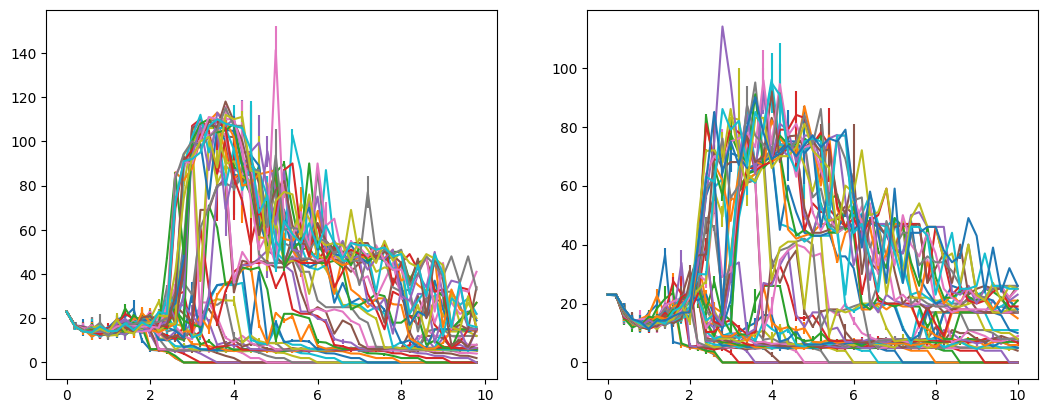

In [74]:
plt.figure(figsize=(12.8,4.8))
plt.subplot(121)
for i,m in enumerate(ms2):
    plt.errorbar(Ks2,df2.unstack().g2.to_numpy().T[i],df2.unstack().g2_std.to_numpy().T[i])
    # plt.plot(Ks2,df2.unstack().r.to_numpy().T[i],'.-')
plt.subplot(122)
for i,m in enumerate(ms[::2]):
    plt.errorbar(Ks[::2],df.unstack().g2.to_numpy()[::2,::2].T[i],df.unstack().g2_std.to_numpy()[::2,::2].T[i])
    # plt.plot(Ks[::2],df.unstack().r.to_numpy()[::2,::2].T[i],'.-')


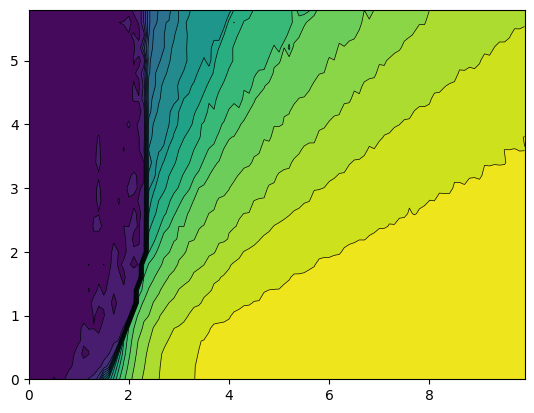

In [ ]:
origin = 'lower'
CS = plt.contourf(KK,MM,r, 20, cmap=plt.cm.viridis, origin=origin)
CS2 = plt.contour(CS, levels=CS.levels[::], colors='k',linewidths = 0.5, origin=origin)

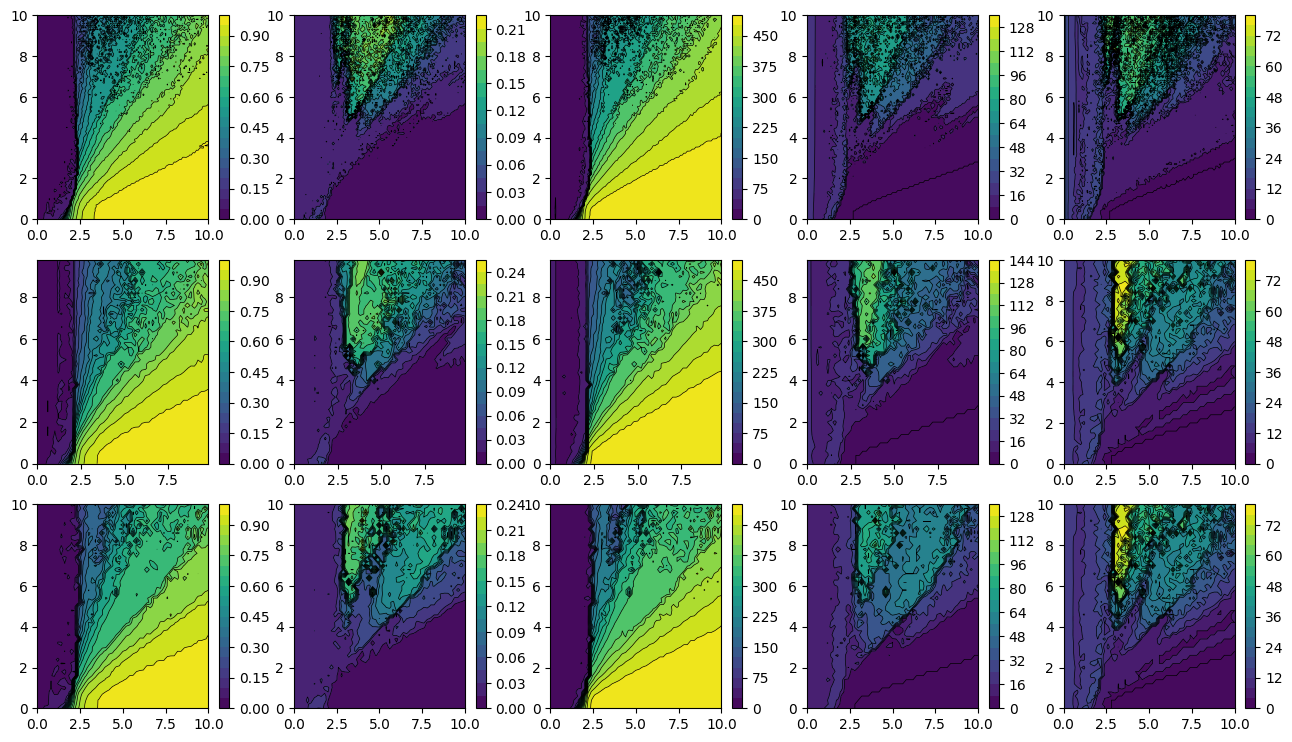

In [79]:
origin = 'lower'
fig = plt.figure(figsize=(16,9))
plt.subplot(351)
CS = plt.contourf(KK,MM,df.unstack().r.to_numpy().T, 20, cmap=plt.cm.viridis, origin=origin)
CS2 = plt.contour(CS, levels=CS.levels[::], colors='k',linewidths = 0.5, origin=origin)
plt.colorbar(CS)

plt.subplot(352)
CS = plt.contourf(KK,MM,df.unstack().rstd.to_numpy().T, 20, cmap=plt.cm.viridis, origin=origin)
CS2 = plt.contour(CS, levels=CS.levels[::], colors='k',linewidths = 0.5, origin=origin)
plt.colorbar(CS)

plt.subplot(353)
CS = plt.contourf(KK,MM,df.unstack().g1.to_numpy().T, 20, cmap=plt.cm.viridis, origin=origin)
CS2 = plt.contour(CS, levels=CS.levels[::], colors='k',linewidths = 0.5, origin=origin)
plt.colorbar(CS)

plt.subplot(354)
CS = plt.contourf(KK,MM,df.unstack().g2.to_numpy().T, 20, cmap=plt.cm.viridis, origin=origin)
CS2 = plt.contour(CS, levels=CS.levels[::], colors='k',linewidths = 0.5, origin=origin)
plt.colorbar(CS)

plt.subplot(355)
CS = plt.contourf(KK,MM,df.unstack().g3.to_numpy().T, 20, cmap=plt.cm.viridis, origin=origin)
CS2 = plt.contour(CS, levels=CS.levels[::], colors='k',linewidths = 0.5, origin=origin)
plt.colorbar(CS)


plt.subplot(356)
CS = plt.contourf(KK2,MM2,df2.unstack().r.to_numpy().T, 20, cmap=plt.cm.viridis, origin=origin)
CS2 = plt.contour(CS, levels=CS.levels[::], colors='k',linewidths = 0.5, origin=origin)
plt.colorbar(CS)

plt.subplot(357)
CS = plt.contourf(KK2,MM2,df2.unstack().rstd.to_numpy().T, 20, cmap=plt.cm.viridis, origin=origin)
CS2 = plt.contour(CS, levels=CS.levels[::], colors='k',linewidths = 0.5, origin=origin)
plt.colorbar(CS)

plt.subplot(358)
CS = plt.contourf(KK2,MM2,df2.unstack().g1.to_numpy().T, 20, cmap=plt.cm.viridis, origin=origin)
CS2 = plt.contour(CS, levels=CS.levels[::], colors='k',linewidths = 0.5, origin=origin)
plt.colorbar(CS)

plt.subplot(359)
CS = plt.contourf(KK2,MM2,df2.unstack().g2.to_numpy().T, 20, cmap=plt.cm.viridis, origin=origin)
CS2 = plt.contour(CS, levels=CS.levels[::], colors='k',linewidths = 0.5, origin=origin)
plt.colorbar(CS)

plt.subplot(3,5,10)
CS = plt.contourf(KK3,MM3,df3.unstack().g3.to_numpy().T, 20, cmap=plt.cm.viridis, origin=origin)
CS2 = plt.contour(CS, levels=CS.levels[::], colors='k',linewidths = 0.5, origin=origin)
plt.colorbar(CS)

plt.subplot(3,5,11)
CS = plt.contourf(KK3,MM3,df3.unstack().r.to_numpy().T, 20, cmap=plt.cm.viridis, origin=origin)
CS2 = plt.contour(CS, levels=CS.levels[::], colors='k',linewidths = 0.5, origin=origin)
plt.colorbar(CS)

plt.subplot(3,5,12)
CS = plt.contourf(KK3,MM3,df3.unstack().rstd.to_numpy().T, 20, cmap=plt.cm.viridis, origin=origin)
CS2 = plt.contour(CS, levels=CS.levels[::], colors='k',linewidths = 0.5, origin=origin)
plt.colorbar(CS)

plt.subplot(3,5,13)
CS = plt.contourf(KK3,MM3,df3.unstack().g1.to_numpy().T, 20, cmap=plt.cm.viridis, origin=origin)
CS2 = plt.contour(CS, levels=CS.levels[::], colors='k',linewidths = 0.5, origin=origin)
plt.colorbar(CS)

plt.subplot(3,5,14)
CS = plt.contourf(KK3,MM3,df3.unstack().g2.to_numpy().T, 20, cmap=plt.cm.viridis, origin=origin)
CS2 = plt.contour(CS, levels=CS.levels[::], colors='k',linewidths = 0.5, origin=origin)
plt.colorbar(CS)

plt.subplot(3,5,15)
CS = plt.contourf(KK3,MM3,df3.unstack().g3.to_numpy().T, 20, cmap=plt.cm.viridis, origin=origin)
CS2 = plt.contour(CS, levels=CS.levels[::], colors='k',linewidths = 0.5, origin=origin)
plt.colorbar(CS)

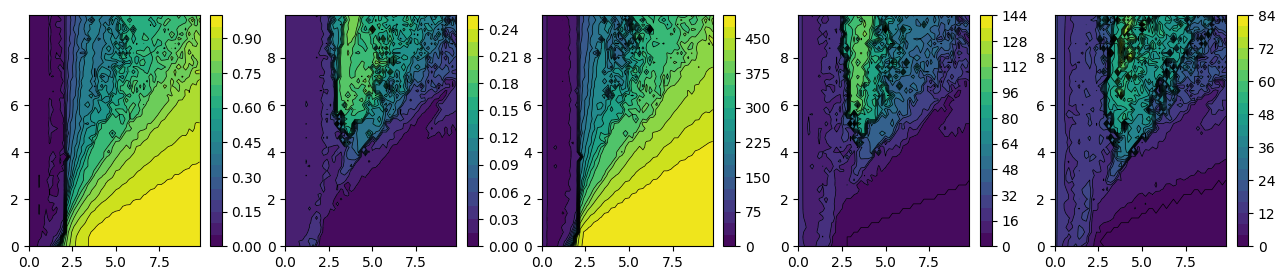

In [58]:
origin = 'lower'
fig = plt.figure(figsize=(16,3))
plt.subplot(151)
CS = plt.contourf(KK2,MM2,df2.unstack().r.to_numpy().T, 20, cmap=plt.cm.viridis, origin=origin)
CS2 = plt.contour(CS, levels=CS.levels[::], colors='k',linewidths = 0.5, origin=origin)
plt.colorbar(CS)

plt.subplot(152)
CS = plt.contourf(KK2,MM2,df2.unstack().rstd.to_numpy().T, 20, cmap=plt.cm.viridis, origin=origin)
CS2 = plt.contour(CS, levels=CS.levels[::], colors='k',linewidths = 0.5, origin=origin)
plt.colorbar(CS)

plt.subplot(153)
CS = plt.contourf(KK2,MM2,df2.unstack().g1.to_numpy().T, 20, cmap=plt.cm.viridis, origin=origin)
CS2 = plt.contour(CS, levels=CS.levels[::], colors='k',linewidths = 0.5, origin=origin)
plt.colorbar(CS)

plt.subplot(154)
CS = plt.contourf(KK2,MM2,df2.unstack().g2.to_numpy().T, 20, cmap=plt.cm.viridis, origin=origin)
CS2 = plt.contour(CS, levels=CS.levels[::], colors='k',linewidths = 0.5, origin=origin)
plt.colorbar(CS)

plt.subplot(155)
CS = plt.contourf(KK2,MM2,df2.unstack().g3.to_numpy().T, 20, cmap=plt.cm.viridis, origin=origin)
CS2 = plt.contour(CS, levels=CS.levels[::], colors='k',linewidths = 0.5, origin=origin)
plt.colorbar(CS)

In [50]:
index = df2[df2.g1_std>1].index
df2.loc[index,'g1'] = np.nan

index = df2[df2.g2_std>1].index
df2.loc[index,'g2'] = np.nan

index = df2[df2.g3_std>1].index
df2.loc[index,'g3'] = np.nan

index = df2[df2.g4_std>1].index
df2.loc[index,'g4'] = np.nan